In [1]:
# This notebook simulates a modifield Rossler system using an explicitly implemented 4th-order
# Runge Kutta algothm. This is helpful when simulating controlled and or synchronized
# oscillators, when it will become simple to include the control or synchronization laws
# directly with the oscillator equations (in dvRossler). The modified Rossler system corresponds
# to taking the log of the z variable of the original system. In the modified system the
# observability from the (new) z variable is much improved.
# Three types of plots are provided for the benefit of the user.
#
# LAA BH 4/10/21

import numpy as np
import matplotlib.pyplot as plt


In [2]:
def dvRossler(x,u,t):
#
# implements the vector field for Rossler's system
# x state vector
# u control input. Here it is placed in the second equation. This can be
# changed manually
# xd time derivative of x (vector field at x)

# standard parameters
    a = 0.398
    b = 2 
    c = 4 
    xd = np.zeros((3,1));

#Differential equations
    xd[0] = -x[1]-np.e**x[2]
    xd[1] = x[0]+a*x[1]
    xd[2] = b*np.e**(-x[2]) + (x[0]-c)

    return xd

In [3]:
def rkRossler(x0,u,h,t):
# 
# implements 4th-order Runge Kutta numerical integration algorithm 
# x0 is the state vector (before calling the integration function - it is 
# the initial condition of the current step)
# u is the control input, considered constant throughout the integration step h 
# h integration step (constant)
# t is the time instant just before calling the integration function 
# the vector field in in dvRossler
  
# 1st call
    xd = dvRossler(x0,u,t)
    savex0 = x0.reshape((-1,1))  
    phi = xd
    x0 = savex0+np.array(0.5*h*xd)

    
# 2nd call
    xd = dvRossler(x0,u,t+0.5*h)
    phi = phi+2*xd
    x0 = savex0+0.5*h*xd

# 3rd call
    xd = dvRossler(x0,u,t+0.5*h)
    phi = phi+2*xd
    x0 = savex0+h*xd

# 4th call
    xd = dvRossler(x0,u,t+h)
    x = savex0+(phi+xd)*h/6

    return (x)



In [4]:
# main block

# integration interval
h = 0.01;
t0 = 0;

# final time
tf = 200/h;
t = np.arange(0.0, tf+1, 1)*h
points = np.linspace(1,len(t)-1,len(t)-1, dtype='int64')

# random inicial conditions
np.random.seed(0)
x0 = np.random.rand(3)-0.5

# this array will contain the trajectory. Row 0 is variable x, row 1 is y, row 2 is z.
# each column corresponds to an integration step. This "trajectory" array is initialized
# with zeros
x = np.array(np.zeros((len(x0),len(t))))

# place the initial condition as the first column of the array
x[:,0] = x0

# if there is any external signal (to simulated a nonautonomous case, for instance)
# produce the external signal here, in u. In this case we simulate the autonomous case.
u = np.array(np.zeros((1,len(t))))

# calls the Runge Kutta integration scheme
for k in points:
    x[:,[k]] = rkRossler(x[:,k-1],u[0,k],h,t[k])



<function matplotlib.pyplot.show(close=None, block=None)>

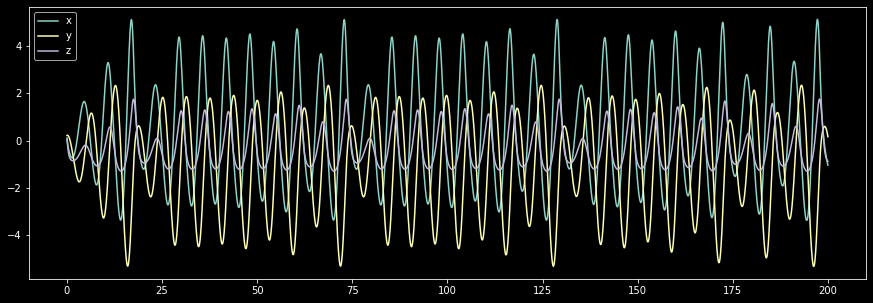

In [5]:
fig = plt.figure(figsize=(15,5))
plt.plot(t,x[0,:])
plt.plot(t,x[1,:])
plt.plot(t,x[2,:])
plt.legend(['x','y','z'])
plt.show

In [7]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=x[0,:],
                    mode='lines',
                    name='x'))
fig.add_trace(go.Scatter(x=t, y=x[1,:],
                    mode='lines',
                    name='y'))
fig.add_trace(go.Scatter(x=t, y=x[2,:],
                    mode='lines', name='z'))

fig.show()

In [8]:
from mpl_toolkits import mplot3d

<function matplotlib.pyplot.show(close=None, block=None)>

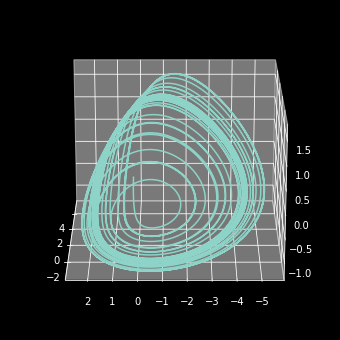

In [8]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.view_init(20, 180)
ax.plot3D(x[0,:],x[1,:],x[2,:])
plt.show

In [9]:

# integration interval
h = 0.01;
t0 = 0;

# final time
tf = 200/h;
t = np.arange(0.0, tf+1, 1)*h
points = np.linspace(1,len(t)-1,len(t)-1, dtype='int64')

# random inicial conditions
np.random.seed(0)
x0 = np.random.rand(3)-0.5

# this array will contain the trajectory. Row 0 is variable x, row 1 is y, row 2 is z.
# each column corresponds to an integration step. This "trajectory" array is initialized
# with zeros
x = np.array(np.zeros((len(x0),len(t))))

# place the initial condition as the first column of the array
x[:,0] = x0


In [10]:
x

array([[0.0488135 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.21518937, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10276338, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [6]:
x[:,0]

array([0.0488135 , 0.21518937, 0.10276338])

In [11]:
(x[2,:])

array([ 0.10276338,  0.08142682,  0.06035108, ..., -0.88082063,
       -0.88285981, -0.88485985])

In [13]:
max(x[2,:])

1.7546393665134414